In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [2]:
plt.style.use('seaborn')

<ipython-input-2-4a43041a1d49>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
sns.set(rc={'figure.figsize':(15, 8)})

## Load Datasets

In [4]:
df_banking = pd.read_csv("/content/banking.csv")

In [6]:
#cara menampilkan semua kolom
pd.set_option('display.max_columns',None)

df_banking.head()

age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week  duration  campaign  pdays  previous  \
0  cellular   aug         thu       210         1    999         0   
1  cellular   nov         fri       138         1    999         0   
2  cellular   jun         thu       339         3      6         2   
3  cellular   apr         fri       185         2    999         0   
4  cellular   aug         fri       137         1      3         1   

      poutcome  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
0  nonexistent           1.4          93.444          -36.1      4.963   
1  nonexistent          -0.1          93.200          -42.0      4.021   
2      success          -1.7          94.055          -39.8      0.729   
3  nonexistent          -1.8          93.075          -47.1      1.405   
4      success          -2.9          92.201          -31.4      0.869   

   nr_employed  y  
0       5228.1  0  
1       5195.8  0  
2       4991.6  1  
3       5099.1  0  
4       5076.2  1

In [7]:
df_banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

# EDA

## Explore & Visualize Data

In [10]:
df_banking.shape[0]

41188

In [8]:
print('Total rows:', df_banking.shape[0])
print('Total features:', df_banking.shape[1])

Total rows: 41188
Total features: 21


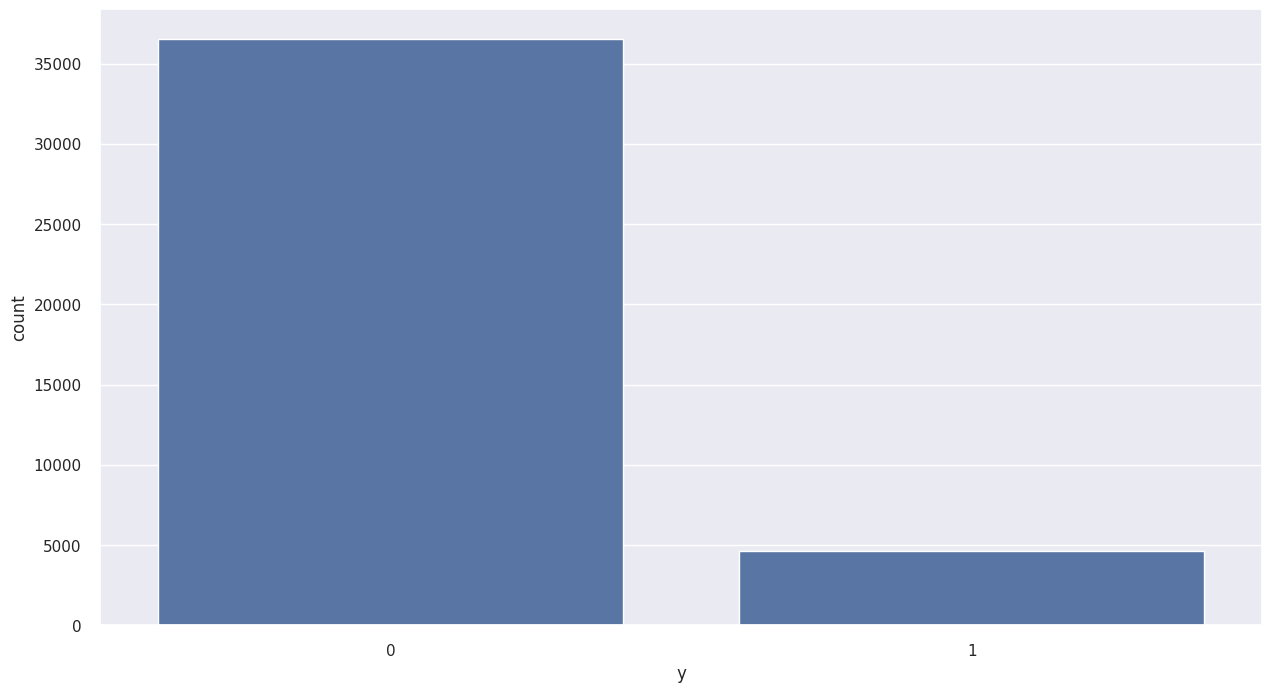

In [11]:
sns.countplot(x='y', data=df_banking)
plt.show()

In [13]:
df_banking['y'].value_counts(normalize=True)

0    0.887346
1    0.112654
Name: y, dtype: float64

#### Check Job Feature

In [14]:
np.unique(df_banking['job'])

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

In [ ]:
df_banking.groupby('job').mean()

<ipython-input-11-b415f92533da>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_banking.groupby('job').mean()


age    duration  campaign       pdays  previous  \
job                                                                    
admin.         38.172762  254.964995  2.633120  954.661618  0.187367   
blue-collar    39.592741  264.725407  2.553317  985.456571  0.123279   
entrepreneur   41.688095  263.446825  2.549206  980.873810  0.138095   
housemaid      45.647317  252.162103  2.633078  962.020811  0.123768   
management     42.375693  257.268409  2.461995  961.643310  0.190024   
retired        61.995286  274.968350  2.492929  901.330640  0.323232   
self-employed  39.921227  261.805970  2.663350  975.097844  0.148425   
services       37.915755  258.303577  2.585575  979.620751  0.156074   
student        25.856369  284.841463  2.050136  838.985095  0.536585   
technician     38.497417  248.464360  2.569559  964.131026  0.153237   
unemployed     39.761468  253.685780  2.594037  935.188073  0.196101   
unknown        45.473498  242.579505  2.639576  935.752650  0.169611   

               emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
job                                                                     
admin.             0.027510       93.539350     -40.253529   3.560794   
blue-collar        0.249337       93.659735     -41.368686   3.772841   
entrepreneur       0.190714       93.615290     -41.223016   3.829683   
housemaid          0.455531       93.679116     -39.415553   4.045056   
management        -0.028424       93.519102     -40.486382   3.589656   
retired           -0.684040       93.442457     -38.574815   2.785626   
self-employed      0.091459       93.559451     -40.466750   3.695399   
services           0.176737       93.636923     -41.266864   3.697256   
student           -1.429268       93.330195     -40.229268   1.855050   
technician         0.273192       93.561982     -39.921522   3.817696   
unemployed        -0.124771       93.569057     -39.999312   3.449328   
unknown            0.328622       93.722495     -38.975618   3.929965   

               nr_employed         y  
job                                   
admin.         5164.469034  0.130596  
blue-collar    5175.551715  0.071089  
entrepreneur   5177.678651  0.087302  
housemaid      5181.077766  0.094195  
management     5165.762154  0.114410  
retired        5122.394411  0.249832  
self-employed  5170.708043  0.101990  
services       5171.358912  0.081584  
student        5084.543631  0.322493  
technician     5175.515926  0.107438  
unemployed     5156.041284  0.145642  
unknown        5172.405300  0.120141

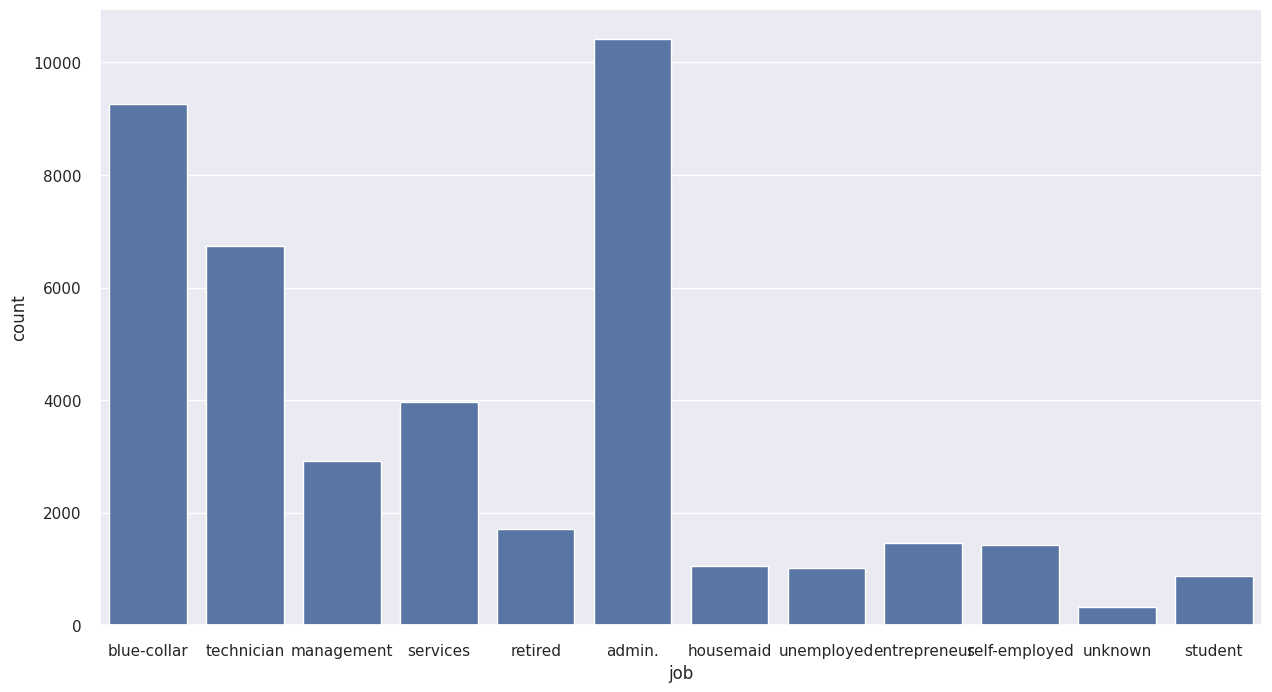

<Figure size 2000x2000 with 0 Axes>

In [15]:
sns.countplot(x='job', data=df_banking)
plt.figure(figsize=(20, 20))
plt.show()

#### Check Marital Feature

In [16]:
np.unique(df_banking['marital'])

array(['divorced', 'married', 'single', 'unknown'], dtype=object)

In [17]:
df_banking.groupby('marital').mean()

<ipython-input-17-33240e40ce23>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_banking.groupby('marital').mean()


age    duration  campaign       pdays  previous  emp_var_rate  \
marital                                                                         
divorced  44.899393  253.790330   2.61340  968.639853  0.168690      0.163985   
married   42.307165  257.438623   2.57281  967.247673  0.155608      0.183625   
single    33.158714  261.524378   2.53380  949.909578  0.211359     -0.167989   
unknown   40.275000  312.725000   3.18750  937.100000  0.275000     -0.221250   

          cons_price_idx  cons_conf_idx  euribor3m  nr_employed         y  
marital                                                                    
divorced       93.606563     -40.707069   3.715603  5170.878643  0.103209  
married        93.597367     -40.270659   3.745832  5171.848772  0.101573  
single         93.517300     -40.918698   3.317447  5155.199265  0.140041  
unknown        93.471250     -40.820000   3.313038  5157.393750  0.150000

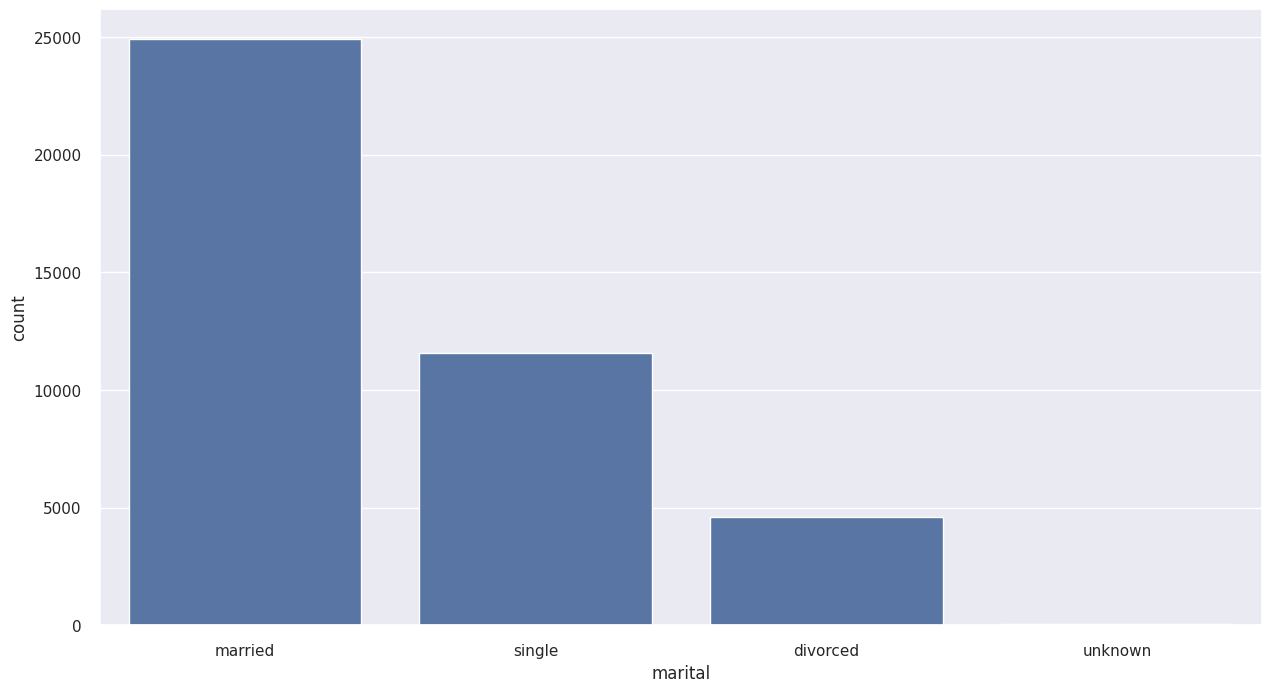

<Figure size 2000x2000 with 0 Axes>

In [18]:
sns.countplot(x='marital', data=df_banking)
plt.figure(figsize=(20, 20))
plt.show()

In [19]:
pd.crosstab(df_banking['marital'],df_banking['y'])

y             0     1
marital              
divorced   4136   476
married   22396  2532
single     9948  1620
unknown      68    12

## Preprocess Data

#### Drop Null Value

In [20]:
df_banking.dropna(inplace=True)

#### Transform Categorical Data

In [21]:
# process categorical data (one-hot-encoding)
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for var in cat_vars:
    cat_list = pd.get_dummies(df_banking[var], prefix=var)
    data1 = df_banking.join(cat_list)
    df_banking = data1

In [22]:
df_banking.head()

age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week  duration  campaign  pdays  previous  \
0  cellular   aug         thu       210         1    999         0   
1  cellular   nov         fri       138         1    999         0   
2  cellular   jun         thu       339         3      6         2   
3  cellular   apr         fri       185         2    999         0   
4  cellular   aug         fri       137         1      3         1   

      poutcome  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
0  nonexistent           1.4          93.444          -36.1      4.963   
1  nonexistent          -0.1          93.200          -42.0      4.021   
2      success          -1.7          94.055          -39.8      0.729   
3  nonexistent          -1.8          93.075          -47.1      1.405   
4      success          -2.9          92.201          -31.4      0.869   

   nr_employed  y  job_admin.  job_blue-collar  job_entrepreneur  \
0       5228.1  0           0                1                 0   
1       5195.8  0           0                0                 0   
2       4991.6  1           0                0                 0   
3       5099.1  0           0                0                 0   
4       5076.2  1           0                0                 0   

   job_housemaid  job_management  job_retired  job_self-employed  \
0              0               0            0                  0   
1              0               0            0                  0   
2              0               1            0                  0   
3              0               0            0                  0   
4              0               0            1                  0   

   job_services  job_student  job_technician  job_unemployed  job_unknown  \
0             0            0               0               0            0   
1             0            0               1               0            0   
2             0            0               0               0            0   
3             1            0               0               0            0   
4             0            0               0               0            0   

   marital_divorced  marital_married  marital_single  marital_unknown  \
0                 0                1               0                0   
1                 0                1               0                0   
2                 0                0               1                0   
3                 0                1               0                0   
4                 0                1               0                0   

   education_basic.4y  education_basic.6y  education_basic.9y  \
0                   1                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   1                   0                   0   

   education_high.school  education_illiterate  education_professional.course  \
0                      0                     0                              0   
1                      0                     0                              0   
2                      0                     0                              0   
3                      1                     0                              0   
4                      0                     0                              0   

   education_university.degree  education_unknown  default_no  \
0                            0     

In [23]:
df_banking.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown',
       'default_yes', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular',
       'contac

In [24]:
# remove categorical data
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
data_vars = df_banking.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars] # filter process

In [ ]:
# df_banking = df_banking.drop(cat_vars,axis=1)

In [26]:
df_banking2 = df_banking[to_keep]
df_banking2.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'mo

#### Prepare Features & Labels

In [27]:
# prepare for the columns
data_vars = df_banking2.columns.values.tolist()
y = ['y']
X = [i for i in data_vars if i not in y]

In [ ]:
# X = df_banking.drop('y',axis=1)
# y= df_banking['y']

In [29]:
len(X)

63

#### Split Data

In [30]:
from sklearn.model_selection import train_test_split

In [ ]:
# X  = df_banking2[X]
# y = df_banking2[y]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_banking2[X], df_banking2[y], test_size=0.3, random_state=0)

In [32]:
X_train.shape

(28831, 63)

In [33]:
X_test.shape

(12357, 63)

## Model Data

In [34]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [42]:
rf_clf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=20)
rf_clf.fit(X_train, y_train)

<ipython-input-42-4fe3d0850361>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=20)

## Test Model

In [43]:
model_score = rf_clf.score(X_train, y_train)
print('Model Accuracy Training:', round(model_score,4))

Model Accuracy Training: 0.9939


In [44]:
model_score = rf_clf.score(X_test, y_test)
print('Model Accuracy Testing:', round(model_score,4))

Model Accuracy Testing: 0.9139


In [45]:
# default random forest (n_estimators=100, criterion='gini')
print('Model Accuracy:', round(model_score,4))

Model Accuracy: 0.9139


In [46]:
# n_estimators=100, criterion='entropy'
print('Model Accuracy:', round(model_score,4))

Model Accuracy: 0.9139


In [ ]:
# n_estimators=500, criterion='entropy', max_depth=10'
print('Model Accuracy:', round(model_score,4))

Model Accuracy: 0.9114


In [ ]:
# n_estimators=10
print('Model Accuracy:', round(model_score,4))

Model Accuracy: 0.9069


## Check Importance Score

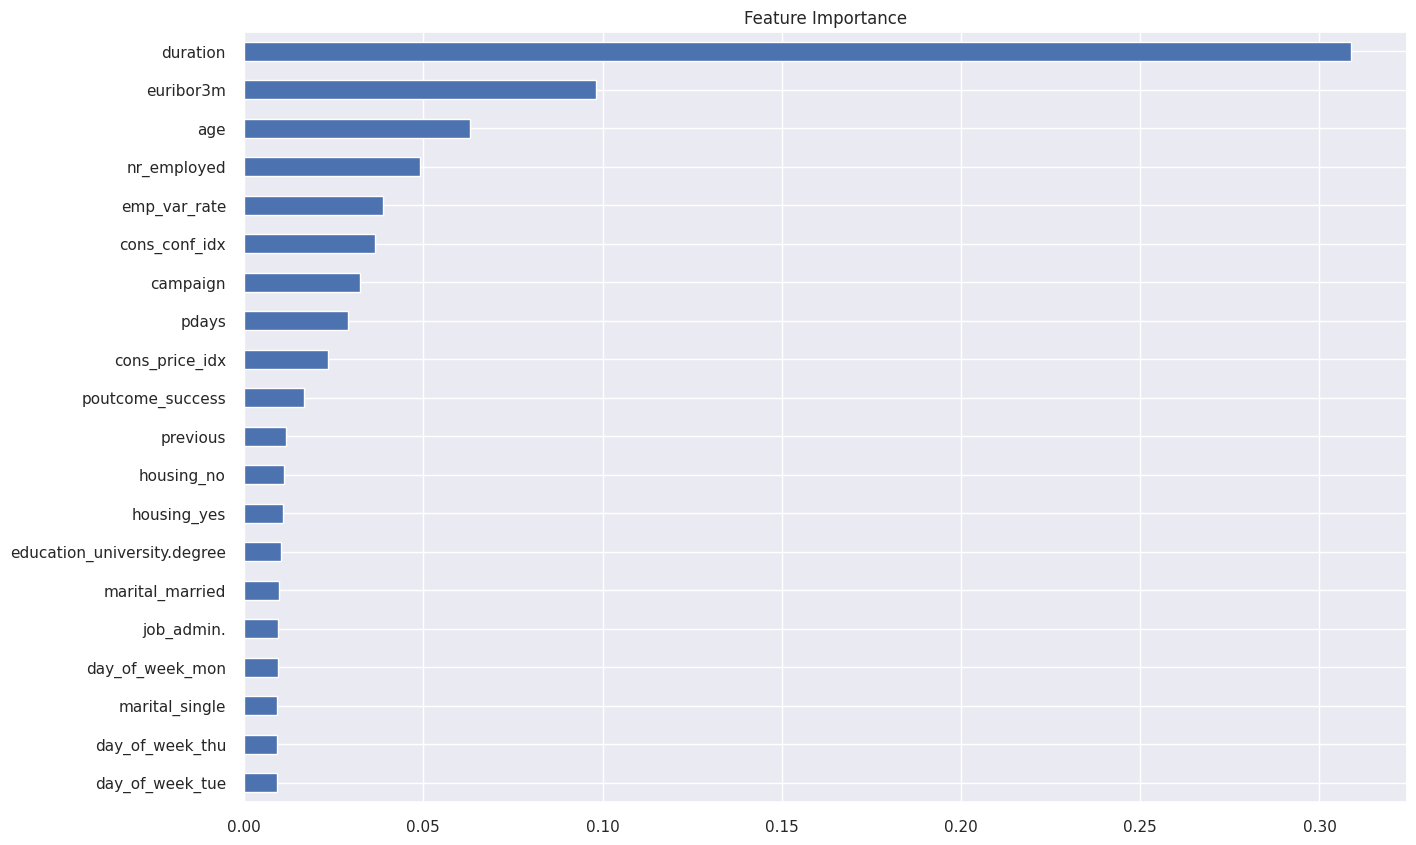

In [47]:
X_ = np.array(X)
importance_scores = rf_clf.feature_importances_
indices = np.argsort(importance_scores)

plt.figure(figsize=(15, 10))
feature_importances = pd.Series(rf_clf.feature_importances_, index=X)
feature_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

## Future Improvements

1. Ask clients to provide more data
2. Augment data using oversampling or undersampling technique
3. Tune hyper-parameters of Random Forest
4. Implement ROC-AUC technique

## Display The Tree

In [48]:
from sklearn.tree import export_graphviz

In [49]:
estimator = rf_clf.estimators_[0] # choose only 1 decision tree

In [50]:
export_graphviz(estimator, rounded=True, proportion=False, out_file='tree.dot',
                feature_names=X_train.columns, precision=2, filled=True)

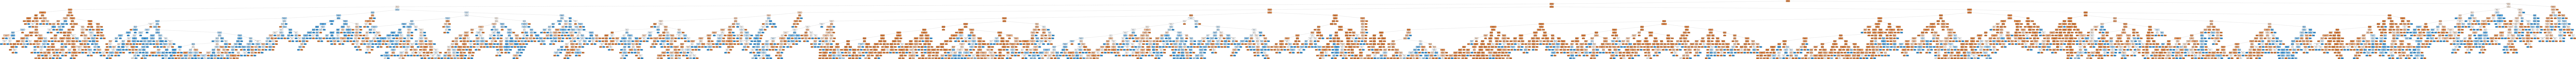

In [51]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=1000'])

from IPython.display import Image
Image(filename = 'tree.png')

---